In [1]:
import os
import sys

pkg_path = os.path.abspath('..')
sys.path.insert(0, pkg_path)

from pyolin.dataframe import GateData
from pyolin.analysis import filter_valid
from pyolin.gate import Gate

import matplotlib.pyplot as plt
plt.ioff()

import pandas
raw = pandas.read_csv('../cyto2func/standardised_cheeky.csv').rename(columns={'rrpu': 'decomp_flor'}).rename(columns={'newstandard': 'rrpu'})
data = GateData(raw)

/home/campus.ncl.ac.uk/b8051106/.local/lib/python3.7/site-packages/ipykernel_launcher.py:35: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


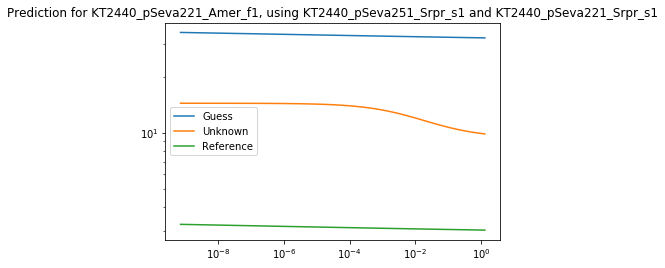

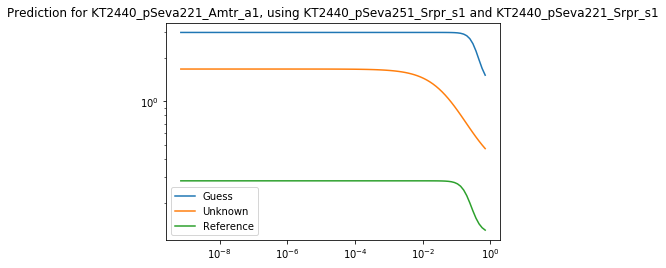

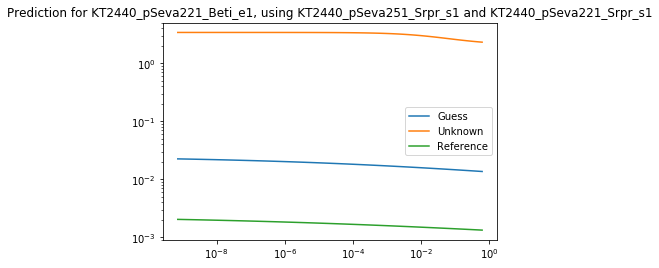

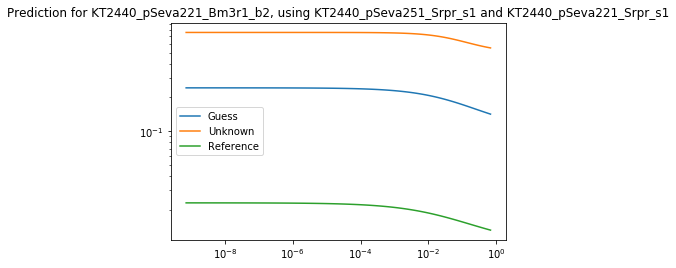

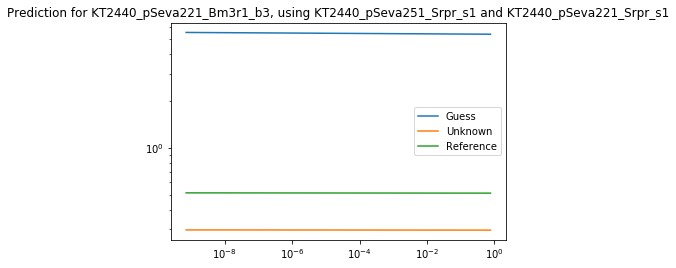

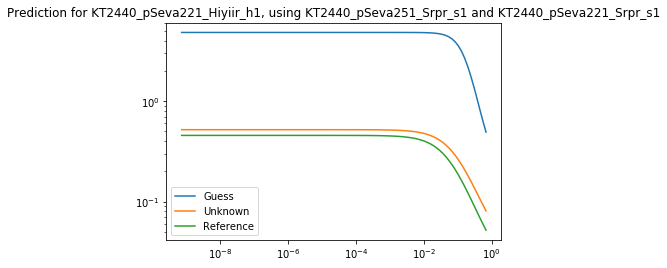

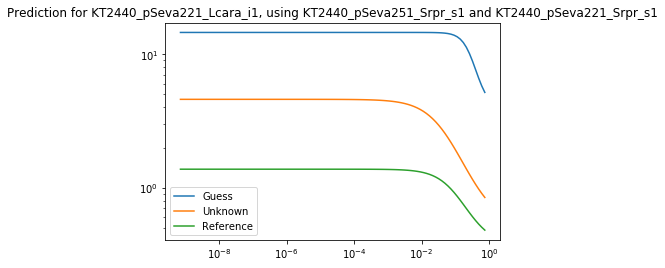

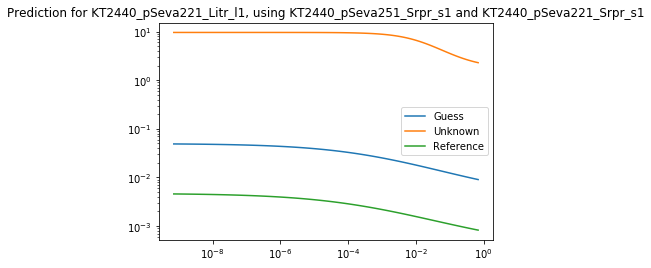

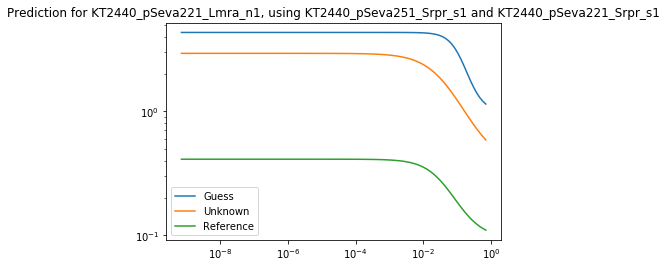

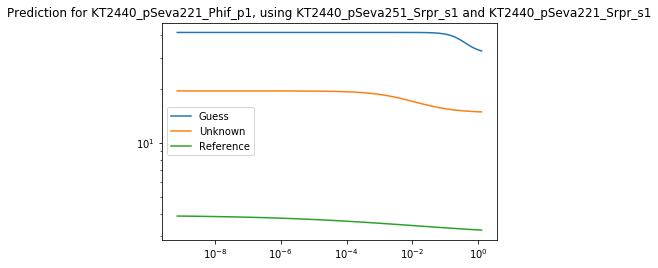

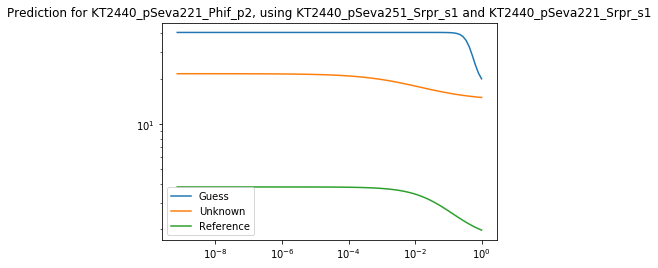

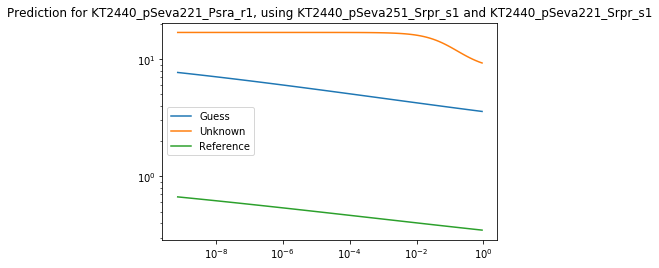

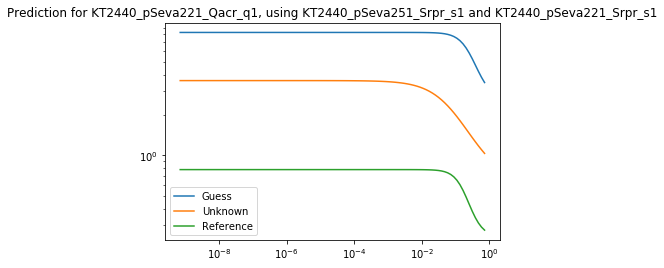

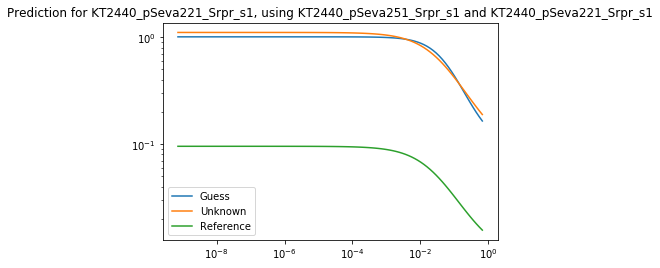

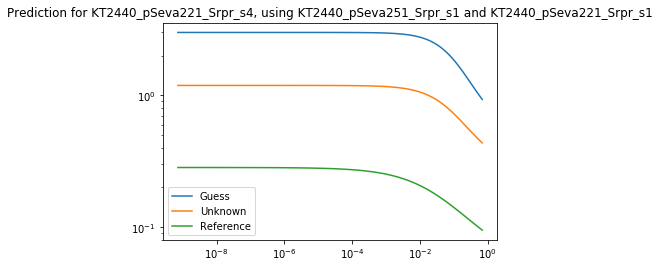

In [32]:
from pyolin.linear_transform import linear_transform_prediction

import matplotlib.pyplot as plt

import numpy
from numpy import log

def remove_negative(numpy_array):
    filtered = [row for row in numpy_array if row[0] > 0.0 and row[1] > 0.0]
    return numpy.vstack(tuple(filtered))

A = data['KT2440':'pSeva251':'Srpr_s1']
B = data['KT2440':'pSeva221':'Srpr_s1']

for ref in data['KT2440':'pSeva251':]:
    unknown = data['KT2440':'pSeva221':ref.cargo]
    if unknown:
        guess_points, solution = linear_transform_prediction(A, B, ref)
        guess_points = remove_negative(guess_points)
        guess = Gate(f"{ref.name}_guess", [], guess_points[:, 0], guess_points[:, 1])
        
        try:
            min_input = log(min(numpy.hstack((A.rpu_in, B.rpu_in, guess.rpu_in))))
            max_input = log(max(numpy.hstack((A.rpu_in, B.rpu_in, guess.rpu_in))))
            smooth_xs = numpy.logspace(min_input, max_input, 100)
        
            fig, axes = plt.subplots()
            axes.plot(smooth_xs, list(map(guess.hill_function, smooth_xs)), label="Guess")
            axes.plot(smooth_xs, list(map(unknown.hill_function, smooth_xs)), label="Unknown")
            axes.plot(smooth_xs, list(map(ref.hill_function, smooth_xs)), label="Reference")
            axes.set_yscale('log')
            axes.set_xscale('log')
            axes.set_title(f"Prediction for {unknown.name}, using {A.name} and {B.name}")
            axes.legend()
            fig.show()
        except ValueError:
            print(f"A ValueError was raised for: {guess}")

In [29]:
from pyolin.linear_transform import optim_matrix

for A in data['KT2440':'pSeva251':]:
    B = data['KT2440':'pSeva221':A.cargo]
    try:
        valid = A.has_valid_thresholds and B.has_valid_thresholds
        if valid:
            print(f"{A.cargo} :: {optim_matrix(A, B).fun}")
    except RuntimeError:
        pass
    except AttributeError:
        pass

Hiyiir_h1 :: 0.08642423230505798
Litr_l1 :: 19.535091626853117
Lmra_n1 :: 0.719825960602294
Srpr_s1 :: 0.1810981991182852
Srpr_s4 :: 0.24710430424895274


In [22]:
len(data['KT2440':'pSeva251':])

15